# **Task-01**

Shape: (150, 4)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Statistical summary:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000        

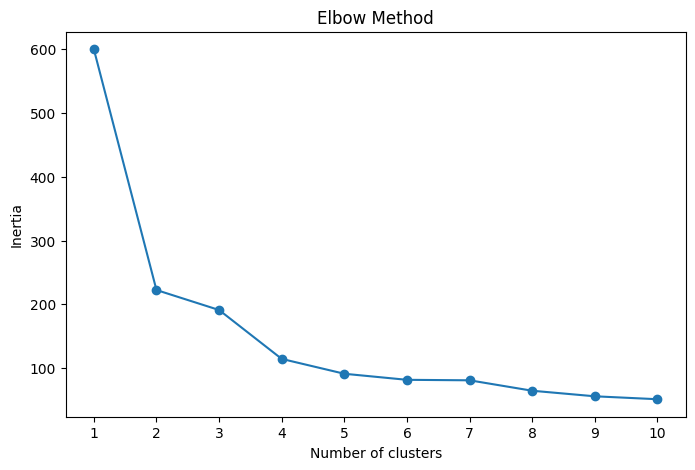


Cluster counts:
 cluster
0    96
1    33
2    21
Name: count, dtype: int64

--- Cluster 0 stats ---
                   count      mean       std  min    25%   50%  75%  max
sepal length (cm)   96.0  6.314583  0.622724  4.9  5.800  6.30  6.7  7.9
sepal width (cm)    96.0  2.895833  0.315534  2.2  2.700  2.90  3.1  3.8
petal length (cm)   96.0  4.973958  0.769586  3.5  4.400  4.90  5.6  6.9
petal width (cm)    96.0  1.703125  0.411532  1.0  1.375  1.65  2.0  2.5
cluster             96.0  0.000000  0.000000  0.0  0.000  0.00  0.0  0.0

--- Cluster 1 stats ---
                   count      mean       std  min  25%  50%  75%  max
sepal length (cm)   33.0  5.169697  0.288839  4.6  5.0  5.1  5.4  5.8
sepal width (cm)    33.0  3.630303  0.270976  3.3  3.4  3.5  3.8  4.4
petal length (cm)   33.0  1.493939  0.181899  1.0  1.4  1.5  1.6  1.9
petal width (cm)    33.0  0.272727  0.115306  0.1  0.2  0.2  0.4  0.6
cluster             33.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0

--- Cluster 2 s

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# 1. Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# --- Basic EDA ---
print("Shape:", df.shape)
print(df.head())
print("\nStatistical summary:\n", df.describe())

# 2. Preprocessing
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# 3. Elbow method to find optimal K
inertia = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.xticks(K_range)
plt.show()

# 4. K-Means clustering (choose k based on elbow, e.g., 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

print("\nCluster counts:\n", df['cluster'].value_counts())

# 5. Cluster statistics
for i in range(optimal_k):
    print(f"\n--- Cluster {i} stats ---")
    print(df[df['cluster'] == i].describe().T)


# **TASK-02**

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('customer_data.xlsx')
print(df.head())
print(df.describe())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.1563860

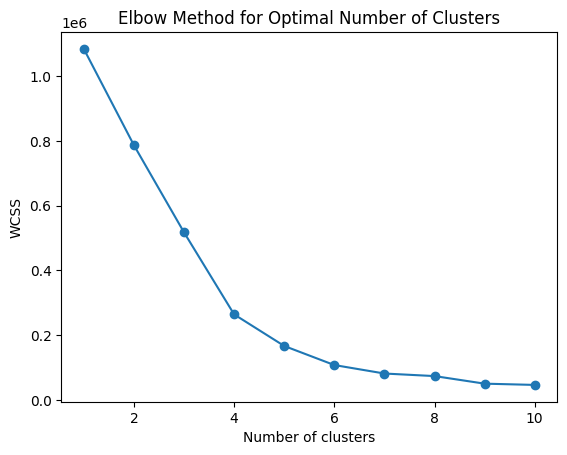

In [9]:
features = ['Quantity', 'UnitPrice']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print("Cluster Centers (Standardized Space):\n", kmeans.cluster_centers_)
print("Cluster Summary:\n", df.groupby('Cluster')[features].mean())

Cluster Centers (Standardized Space):
 [[ 3.04071621e-06 -5.75012740e-03]
 [-4.74993384e-02  1.00515183e+02]
 [ 3.55810287e+02 -3.15328759e-02]
 [-3.55897890e+02 -3.15328759e-02]]
Cluster Summary:
              Quantity    UnitPrice
Cluster                           
0            9.552913     4.054733
1           -0.806452  9730.436452
2        77605.000000     1.560000
3       -77605.000000     1.560000


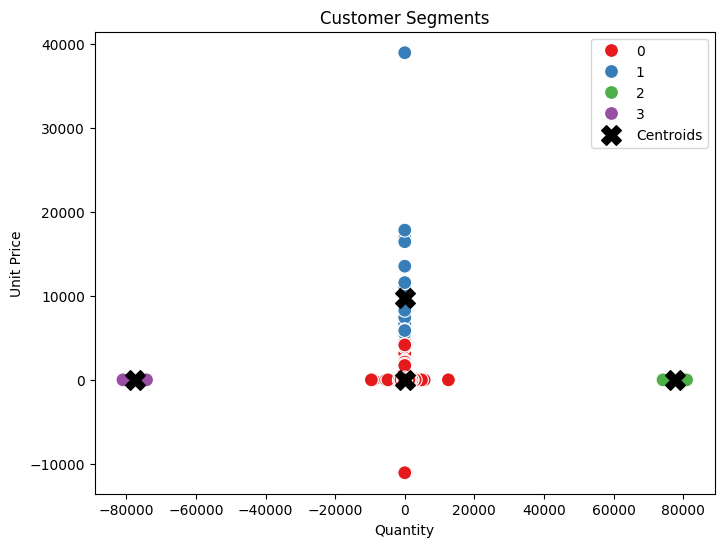

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Quantity', y='UnitPrice',  hue='Cluster',  data=df,  palette='Set1',s=100
)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids'
)
plt.title('Customer Segments')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.legend()
plt.show()

# **TASK-03**

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("marketing_campaign.csv", sep="\t")
print(df.head())
print(df.describe())
print(df.columns)

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

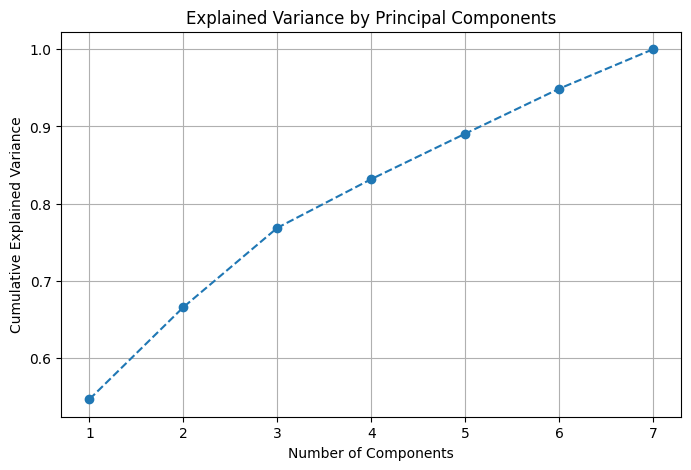

Number of components to retain 90% variance: 6

Principal Components Loadings:
       Income  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
PC1  0.374509  0.364069   0.390690         0.413980         0.399908   
PC2  0.497344  0.565410  -0.356725         0.183715        -0.346108   
PC3 -0.116354  0.170880  -0.174944        -0.223909        -0.114495   
PC4  0.231026 -0.039636  -0.411357        -0.301698        -0.260158   
PC5  0.621974 -0.397318   0.488149        -0.293726        -0.305598   
PC6  0.385847 -0.463619  -0.527776         0.137523         0.543753   

     MntSweetProducts  MntGoldProds  
PC1          0.384950      0.308328  
PC2         -0.336436     -0.197425  
PC3         -0.231834      0.899814  
PC4          0.783910      0.051218  
PC5         -0.167941      0.095542  
PC6         -0.186644      0.090647  

Transformed Data (first 5 rows):
        PC1       PC2       PC3       PC4       PC5       PC6
0  3.560977 -1.086825 -0.372331 -0.569474 -0.900079  0

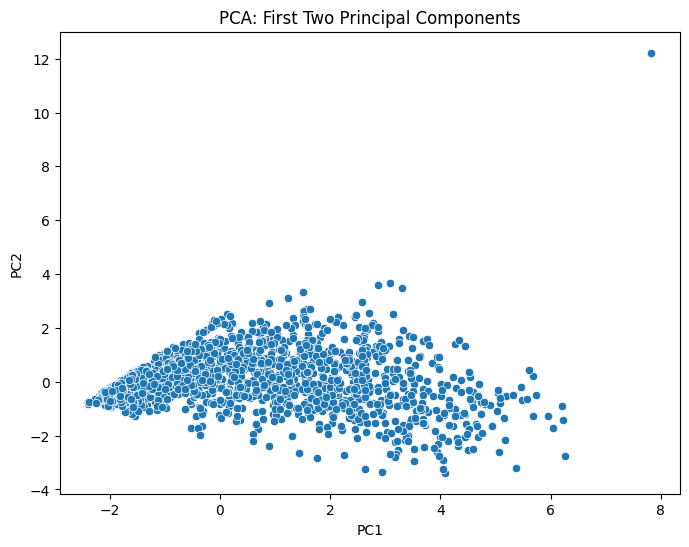

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("marketing_campaign.csv", sep="\t")
print(df.head())
print(df.describe())

# Strip column names
df.columns = df.columns.str.strip()

# Selected financial features for PCA
features = [
    'Income',
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds'
]

# Handle missing income values
df['Income'] = df['Income'].fillna(df['Income'].median())

# Extract feature matrix
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(features)+1), cumulative_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Number of components for 90% variance
n_components = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Number of components to retain 90% variance: {n_components}")

# Apply PCA again with selected components
pca_final = PCA(n_components=n_components)
X_reduced = pca_final.fit_transform(X_scaled)

# PCA Loadings/Dataframe
pca_df = pd.DataFrame(
    pca_final.components_,
    columns=features,
    index=[f"PC{i+1}" for i in range(n_components)]
)

print("\nPrincipal Components Loadings:")
print(pca_df)

# Transformed dataset
df_pca = pd.DataFrame(X_reduced, columns=[f"PC{i+1}" for i in range(n_components)])
print("\nTransformed Data (first 5 rows):")
print(df_pca.head())

# Scatterplot of first two PCs
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PC1',
    y='PC2',
    data=df_pca
)
plt.title('PCA: First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
